In [5]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
# Loading the Dataset
data = pd.read_csv('Car Insurance Modelling.csv')

In [9]:
# Analyse the Top 5 rows of the Dataset
data.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [15]:
# Now let’s analyze the summary statistics
data.describe(include='all')

,age_of_driver,car_age,region,number_of_claims
count,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,Rural,NaN
freq,NaN,NaN,343,NaN
mean,33.112000,6.673000,NaN,0.675000
std,9.253598,4.377583,NaN,0.822223
min,18.000000,0.000000,NaN,0.000000
25%,25.000000,3.000000,NaN,0.000000
50%,33.000000,6.000000,NaN,0.000000
75%,41.000000,11.000000,NaN,1.000000


In [17]:
# Checking for missing values
data.isnull().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

In [19]:
# Now let’s proceed with visualizing the distributions and analyzing the categorical variables
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

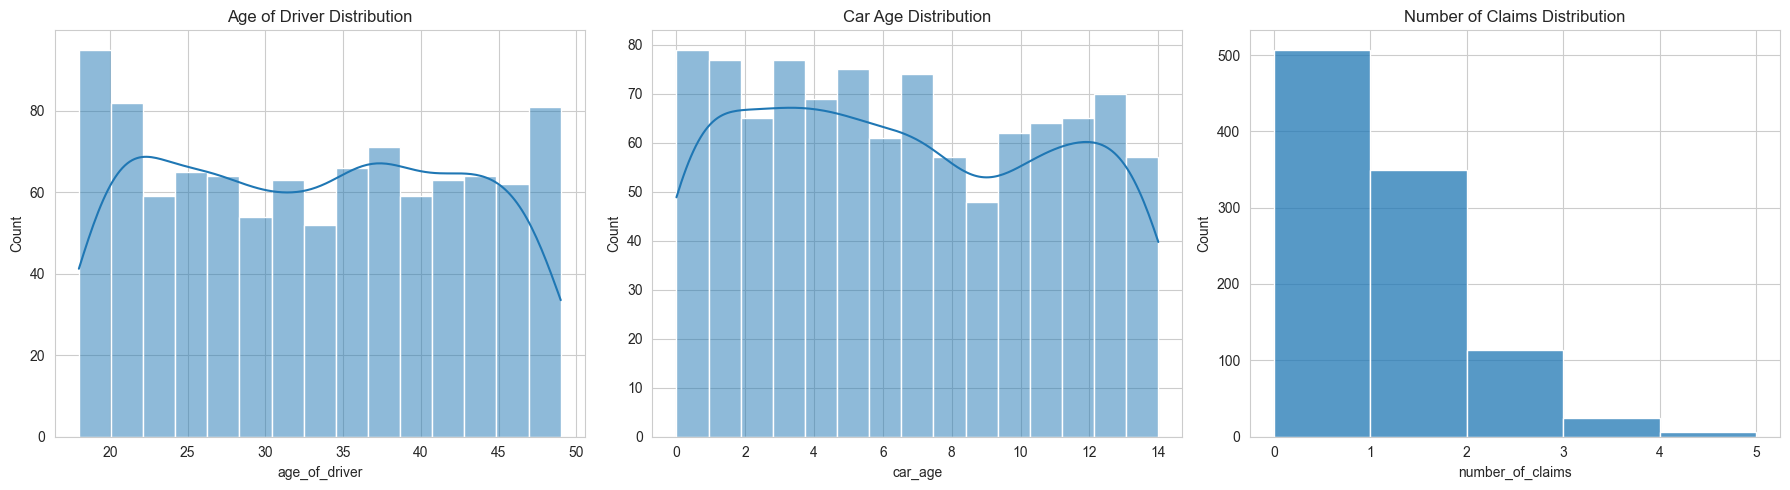

In [25]:
# Plotting distributions of numerical variables
fig, ax = plt.subplots(1, 3 , figsize = (18 , 5))

sns.histplot(data['age_of_driver'], kde = True, bins = 15, ax = ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(data['car_age'], kde = True, bins = 15 , ax = ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(data['number_of_claims'], kde = False, bins = range(6), ax = ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

#### Data Preprocessing


In [28]:
from sklearn.model_selection import train_test_split

In [34]:
insurance_data_encoded = pd.get_dummies(data, columns = ['region'], drop_first = True)

In [36]:
# splitting the data into training and testing sets
train, test = train_test_split(insurance_data_encoded, test_size=0.2, random_state= 42)

In [38]:
train.head()

,age_of_driver,car_age,number_of_claims,region_Suburban,region_Urban
29,26,13,1,False,False
535,42,9,2,True,False
695,44,8,1,False,False
557,41,3,1,True,False
836,31,12,0,False,True


##### The ‘region’ variable has been one-hot encoded, resulting in two new variables region_Suburban and region_Urban (with region_Rural being the baseline category implicitly). The data has also been split into training (80%) and testing (20%) sets.

#### Car Insurance Modelling for Event Frequency


In [44]:
# Prepare the data for modelling
X_train = train.drop('number_of_claims', axis = 1)
y_train = train['number_of_claims']

In [46]:
# Adding constant to the predictor variables
X_train_const = sm.add_constant(X_train)

In [68]:
X_train = X_train.astype(int)


In [58]:
print(X_train.select_dtypes(include=['object']).head())
print(y_train)


Empty DataFrame
Columns: []
Index: [29, 535, 695, 557, 836]
29     1
535    2
695    1
557    1
836    0
      ..
106    0
270    2
860    0
435    2
102    1
Name: number_of_claims, Length: 800, dtype: int64


In [60]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [62]:
X_train = pd.get_dummies(X_train, drop_first=True)


In [64]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [70]:
import statsmodels.api as sm

# Convert boolean columns to integers
X_train = X_train.astype(int)

# Add constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit Poisson GLM model
poisson_glm = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()

# Print summary
print(poisson_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_claims   No. Observations:                  800
Model:                            GLM   Df Residuals:                      795
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.44
Date:                Mon, 07 Apr 2025   Deviance:                       829.41
Time:                        10:18:41   Pearson chi2:                     770.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02749
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0906      0.181     

##### The Poisson GLM has been fit with the following results:

- const: Represents the intercept. The estimate is 0.0906, but it’s not statistically significant (p-value: 0.616).
- age_of_driver: The coefficient is -0.0205, indicating that with each additional year of the driver’s age, the log of expected claims decreases. It’s statistically significant (p-value < 0.001), suggesting a strong relationship between the age of the driver and the number of claims.
- car_age: The coefficient is 0.0152, suggesting that older cars tend to have slightly higher expected claims, although this effect is not statistically significant (p-value: 0.124).
- region_Suburban and region_Urban: The coefficients for these categories are 0.0799 and 0.0861, respectively. Both are compared to the baseline “Rural” category and indicate slightly higher expected claims in suburban and urban areas. However, neither is statistically significant (p-values: 0.450 and 0.427, respectively).

#### Summary
So, car insurance modelling refers to the use of statistical and mathematical models to accurately predict events such as the frequency of claims, the severity of claims, or the total cost associated with claims, which in turn helps in pricing insurance products, managing risk, and optimizing business strategies.